Binary Logistic Regression - the target variable has only two possible outcomes: cancer or no cancer.

Yes = 1
No = 0

In [30]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [31]:
df = pd.read_csv('survey_lung_cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [32]:
lung_data = df.rename(columns={"GENDER":"gender","AGE":"age","SMOKING":"smoking","YELLOW_FINGERS":"yellow_fingers","ANXIETY":"anxiety","PEER_PRESSURE":"peer_pressure","CHRONIC DISEASE":"chronic_disease","FATIGUE ":"fatigue","ALLERGY ":"allergy","WHEEZING":"wheezing","ALCOHOL CONSUMING":"alcohol_consumption","COUGHING":"couching","SHORTNESS OF BREATH":"breath_shortness","SWALLOWING DIFFICULTY":"swallowing_difficulty","CHEST PAIN":"chest_pain","LUNG_CANCER":"lung_cancer"})
lung_data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consumption,couching,breath_shortness,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [33]:
lung_data.dtypes

gender                   object
age                       int64
smoking                   int64
yellow_fingers            int64
anxiety                   int64
peer_pressure             int64
chronic_disease           int64
fatigue                   int64
allergy                   int64
wheezing                  int64
alcohol_consumption       int64
couching                  int64
breath_shortness          int64
swallowing_difficulty     int64
chest_pain                int64
lung_cancer              object
dtype: object

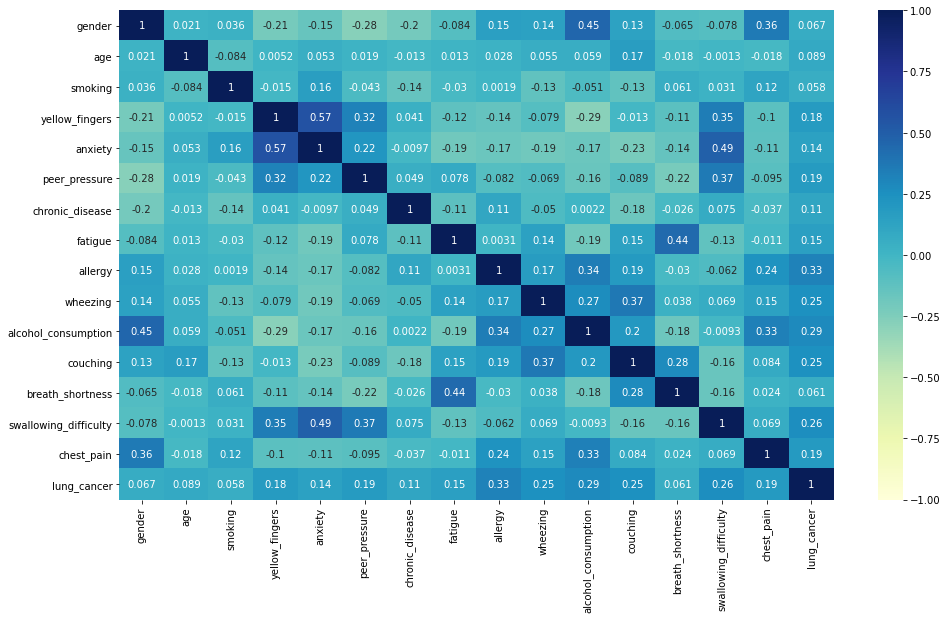

In [65]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(lung_data.corr(),vmin=-1, vmax=1,annot = True,cmap = 'YlGnBu')
plt.show()

In [72]:
lung_data["lung_cancer"].value_counts()

1    270
0     39
Name: lung_cancer, dtype: int64

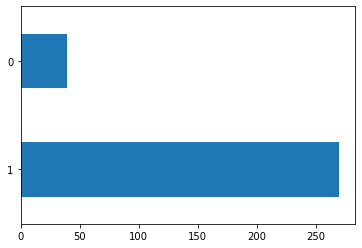

In [73]:
lung_data["lung_cancer"].value_counts().plot.barh();

<function matplotlib.pyplot.show(close=None, block=None)>

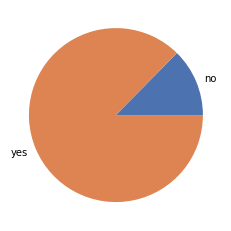

In [37]:
cancer_prediction = lung_data.groupby('lung_cancer')['lung_cancer'].count()
prediction = ['no', 'yes']
colors=sns.color_palette('deep')
plt.pie(cancer_prediction, labels = prediction, colors=colors)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

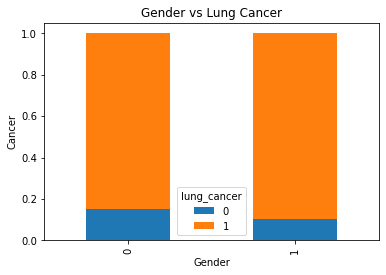

In [76]:
table=pd.crosstab(lung_data.gender,lung_data.lung_cancer)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gender vs Lung Cancer')
plt.xlabel('Gender') # 1=male, 0=female
plt.ylabel('Cancer')
plt.show

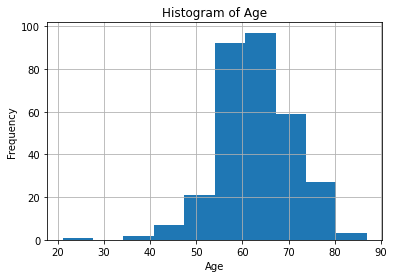

In [77]:
lung_data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [38]:
from sklearn.preprocessing import LabelEncoder

In [58]:
#encode column labels
cols = ['gender','smoking','yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease','fatigue','allergy','wheezing', 'alcohol_consumption', 'couching', 'breath_shortness', 'swallowing_difficulty', 'chest_pain', 'lung_cancer']
lung_data[cols] = lung_data[cols].apply(LabelEncoder().fit_transform)
lung_data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consumption,couching,breath_shortness,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [51]:
feature_cols = ['gender','age', 'smoking', 'yellow_fingers','anxiety','peer_pressure','chronic_disease','fatigue','allergy','wheezing','alcohol_consumption','couching','breath_shortness','swallowing_difficulty','chest_pain']
X = lung_data[feature_cols] #features
y = lung_data.lung_cancer #target variable
X.shape, y.shape

((309, 15), (309,))

In [52]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
#create a logistics regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)#hyperparameter

In [54]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9307359307359307
Testing Data Score: 0.9358974358974359


In [56]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [68]:
 pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
73,1,1
74,1,1
75,1,1
76,1,1


In [59]:
#evaluate the performance of the model with confusion matrix 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 6,  4],
       [ 1, 67]], dtype=int64)

6 & 67 are actual predictions (True Positive/ True Negative), 1 & 4 are inaccurate predictions (False Positive/ False Negative)

Text(0.5, 257.44, 'Predicted class')

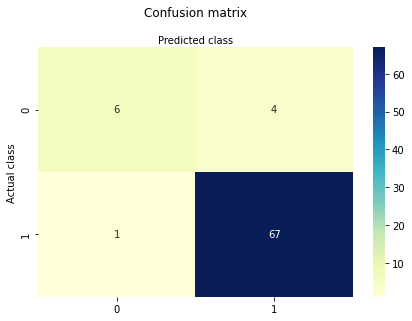

In [69]:
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [62]:
#check model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions)) #correctly predicted observations of all observations
print("Precision:",metrics.precision_score(y_test, predictions)) #ratio of correctly predicted positive observations
print("Recall:",metrics.recall_score(y_test, predictions)) #correctly predicted positive observations

Accuracy: 0.9358974358974359
Precision: 0.9436619718309859
Recall: 0.9852941176470589


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.94      0.99      0.96        68

    accuracy                           0.94        78
   macro avg       0.90      0.79      0.83        78
weighted avg       0.93      0.94      0.93        78



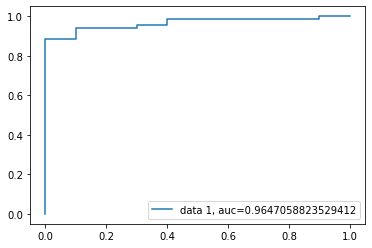

In [80]:
#plot Receiver Operating Characteristic(ROC) curve to see the true positive rate against the false positive rate
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()